# Etude sur Alien vs Predator - épisode 3 : MobileNetV2

Développer un programme de vision par ordinateur capable de différencier avec précision un Alien d'un Predator.

### Je teste MobileNetV2

Contexte du projet

L'épisode 2 a mis en évidence que la technique de "data augmentation" permet de diminuer de manière très efficace le surapprentissage mais n'améliore que très peu (dans notre exemple !) la performance de différenciation d'une image d'un alien d'une image d'un prédator. Dans l'épisode 3, nous allons utiliser la technique dite de "transfer learning" et plus particulièrement d'extractions de caractéristiques ("features extraction") pour améliorer les performances du programme de vision par ordinateur.

エピソード2では、データ補強技術は過学習を減らすのに非常に有効であるが、エイリアン画像と捕食者画像の区別の性能は（我々の例では！）わずかに向上するのみであることが示された。第3話では、コンピュータビジョンのプログラムの性能を向上させるために、転移学習、より具体的には特徴抽出を利用します。


La procédure à suivre est la suivante :

    Charger le modèle VGG-16 (mais qu'est-ce donc que ce VGG-16 ?) ;
    Extraire les caractéristiques des images des jeux d'apprentissage, de validation et de test via VGG-16 ;
    Entrainer un perceptron multi-couches avec le code Keras/TensorFlow suivant pour prédire à partir des caractéristiques extraites par VGG-16 la sortie (Alien ou Prédator) :

model = models.Sequential()

model.add(layers.Dense(units=256, activation='relu', input_dim=4 * 4 * 512))

model.add(layers.Dense(units=1, activation='sigmoid'))

    Conclure.

    VGG-16モデルをロードします（VGG-16とは一体何でしょうか？）
    VGG-16により、トレーニングセット、検証セット、テストセットから画像特徴を抽出する。
    VGG-16で抽出した特徴量から出力（エイリアンかプレデターか）を予測するために、以下のKeras/TensorFlowコードで多層パーセプトロンを学習させます。

model = models.Sequential()

model.add(layers.Dense(units=256, activation='relu', input_dim=4 * 4 * 512))

model.add(layers.Dense(units=1, activation=sigmoid'))

    結論を出す。




Tâches optionnelles, pour les plus courageuses et les plus courageux d'entre vous :

    Tester d'autres modèles que VGG-16 pour effectuer l'étape de "features extraction" ;
    Tester d'autres modèles de Machine Learning (par exemple SVM) pour effectuer l'étape de supervision.

オプションのタスク、勇敢なあなたへ。

    VGG-16以外のモデルで「特徴抽出」ステップをテストする。
    他の機械学習モデル（例：SVM）をテストして、監督ステップを実行する。



### 1 - import librarys

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

### 2 - set option pour l'affichage

In [2]:
pd.set_option("max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("max_row", 500)

### 3 - charger des images

In [3]:
dataset_dir = 'Data/'

TRAINING_DIR = dataset_dir + 'Train/'
VALIDATION_DIR = dataset_dir + 'Validation/'
TEST_DIR = dataset_dir + 'Test/'

In [4]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [5]:
train_generator = datagen.flow_from_directory(TRAINING_DIR,
                                            target_size = (150, 150),                                             
                                            batch_size = 494,
                                            class_mode="binary",
                                                        #seed=0
                                              
                                             )

Found 494 images belonging to 2 classes.


In [6]:
X_train = train_generator[0][0]
y_train=  train_generator[0][1]

In [7]:
X_train.shape

(494, 150, 150, 3)

In [8]:
val_generator = datagen.flow_from_directory(VALIDATION_DIR,
                                            target_size=(150, 150),
                                            batch_size = 200,
                                            class_mode="binary",
                                            #seed=0,
                                           
                                           )

Found 200 images belonging to 2 classes.


In [33]:
test_generator = datagen.flow_from_directory(TEST_DIR,
                                            target_size=(150, 150),
                                            batch_size = 200,
                                            class_mode="binary",
                                            #seed=0,
                                           
                                           )

Found 200 images belonging to 2 classes.


In [9]:
X_val = val_generator[0][0]
y_val = val_generator[0][1]

In [34]:
X_test = test_generator[0][0]
y_test = test_generator[0][1]

In [10]:
model_mnv2_all = MobileNetV2(
                             #input_shape=IMG_SHAPE,
                             include_top=True,
                             weights='imagenet'
                             )

In [11]:
model_mnv2_all.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [12]:
IMG_SHAPE = (150, 150, 3)

model_mnv2 = MobileNetV2(
                             input_shape=IMG_SHAPE,
                             include_top=False,
                             weights='imagenet'
                             )
model_mnv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][

### Feature maps VGG16 pour Train / Test / Val

In [20]:
feature_train = model_mnv2.predict(train_generator[0][0]).reshape(494, -1)

In [14]:
feature_val = model_mnv2.predict(val_generator[0][0]).reshape(200, -1)

In [35]:
feature_test = model_mnv2.predict(test_generator[0][0]).reshape(200, -1)

In [21]:
feature_train.shape, feature_val.shape,  

((494, 32000), (200, 32000))

### Entrainer un perceptron multi-couches avec le code Keras suivant pour prédire à partir des caractéristiques extraites par VGG-16 la sortie (Alien ou Prédator)

In [22]:
model = Sequential()
model.add(layers.Dense(units=256, activation='relu', input_dim=5 * 5 * 1280))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               8192256   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 8,192,513
Trainable params: 8,192,513
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(feature_train, 
          y_train,
          epochs = 40,
          validation_data = (feature_val, 
                             y_val), 
          steps_per_epoch=1,
          validation_steps=1
         )

Epoch 1/40
1/1 [==============================] - 1s 826ms/step - loss: 0.8654 - accuracy: 0.5425 - val_loss: 15.5210 - val_accuracy: 0.5450
Epoch 2/40
1/1 [==============================] - 0s 213ms/step - loss: 13.9179 - accuracy: 0.5486 - val_loss: 18.9887 - val_accuracy: 0.5150
Epoch 3/40
1/1 [==============================] - 0s 220ms/step - loss: 16.4666 - accuracy: 0.5101 - val_loss: 7.0523 - val_accuracy: 0.6450
Epoch 4/40
1/1 [==============================] - 0s 215ms/step - loss: 5.2528 - accuracy: 0.7146 - val_loss: 1.4019 - val_accuracy: 0.8550
Epoch 5/40
1/1 [==============================] - 0s 214ms/step - loss: 0.8930 - accuracy: 0.9008 - val_loss: 6.1257 - val_accuracy: 0.6650
Epoch 6/40
1/1 [==============================] - 0s 222ms/step - loss: 4.6422 - accuracy: 0.7166 - val_loss: 3.5719 - val_accuracy: 0.7650
Epoch 7/40
1/1 [==============================] - 0s 229ms/step - loss: 2.2722 - accuracy: 0.8016 - val_loss: 0.7897 - val_accuracy: 0.9150
Epoch 8/40
1/1 [

In [1]:
# history.history['loss']

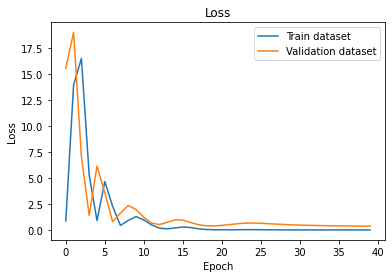

In [27]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Train dataset')
plt.plot(history.history['val_loss'], label='Validation dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

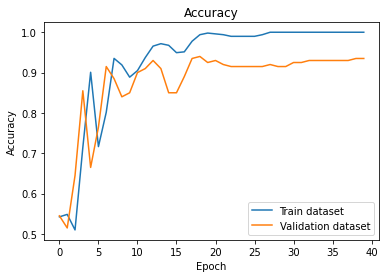

In [28]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Train dataset')
plt.plot(history.history['val_accuracy'], label='Validation dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

confusion matrix

In [29]:
y_train_pred = model.predict(feature_train)
y_train_pred  = y_train_pred > 0.5

cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[247,   0],
       [  0, 247]], dtype=int64)

In [30]:
y_val_pred = model.predict(feature_val)
y_val_pred  = y_val_pred > 0.5

cm_val = confusion_matrix(y_val, y_val_pred)
cm_val

array([[97,  3],
       [10, 90]], dtype=int64)

affichage classification report

In [31]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_train, y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       1.00      1.00      1.00       247
  Predator 1       1.00      1.00      1.00       247

    accuracy                           1.00       494
   macro avg       1.00      1.00      1.00       494
weighted avg       1.00      1.00      1.00       494



In [32]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_val, y_val_pred, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       0.91      0.97      0.94       100
  Predator 1       0.97      0.90      0.93       100

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.93       200
weighted avg       0.94      0.94      0.93       200



save the model

In [36]:
model.save('model_ep3_mnv2')

INFO:tensorflow:Assets written to: model_ep3_mnv2\assets


### test

In [37]:
y_test_pred = model.predict(feature_test)

In [38]:
y_test_pred  = y_test_pred > 0.5

In [39]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[97,  3],
       [12, 88]], dtype=int64)

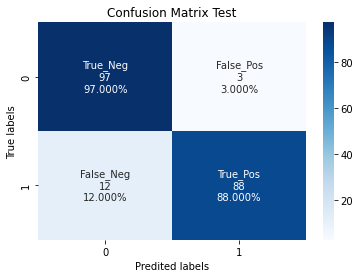

In [42]:
ax= plt.subplot()

group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_test.flatten()]
group_percentages1 = ["{0:.3%}".format(value) for value in cm_test.flatten()[0:2]/np.sum(cm_test.flatten()[0:2])]
group_percentages2 = ["{0:.3%}".format(value) for value in cm_test.flatten()[2:]/np.sum(cm_test.flatten()[2:])]
group_percentages = np.append(group_percentages1, group_percentages2).tolist()
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(cm_test, annot=labels, fmt='', cmap='Blues')

ax.set_xlabel('Predited labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix Test') 

plt.show()

In [43]:
from sklearn.metrics import classification_report

In [44]:
target_names = ['Alien 0', 'Predator 1']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

     Alien 0       0.89      0.97      0.93       100
  Predator 1       0.97      0.88      0.92       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



In [47]:
AUC_keras = tensorflow.keras.metrics.AUC()
AUC_keras.update_state(y_test, y_test_pred)
AUC_keras.result().numpy()

0.925

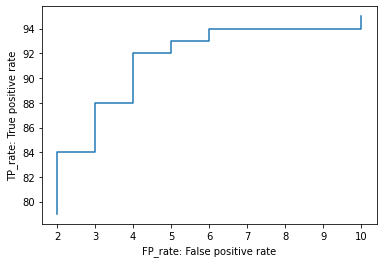

In [48]:
#COURBE ROC

FP_rate = []
TP_rate = []

for seuil in AUC_keras.thresholds[1:-1] :
    FP_rate_seuil = tensorflow.keras.metrics.FalsePositives(thresholds=seuil)
    FP_rate_seuil.update_state(y_test, model.predict(feature_test).flatten())
    
    FP_rate.append(FP_rate_seuil.result().numpy())
    
    
    TP_rate_seuil = tensorflow.keras.metrics.TruePositives(thresholds=seuil)
    TP_rate_seuil.update_state(y_test, model.predict(feature_test).flatten())
    
    TP_rate.append(TP_rate_seuil.result().numpy())

    
    
#print(TP_rate)
#print(FP_rate)
    
fig = plt.figure()
plt.plot(FP_rate, TP_rate)
plt.xlabel('FP_rate: False positive rate')
plt.ylabel('TP_rate: True positive rate')
plt.show()   

#### Observation :
    J'ai obtune l'accuracy de 0.93 avec MobileNetV2 comme VGG-16.

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

https://github.com/tkeldenich/Computer_Vision_CNN_DataAugmentation/blob/main/Computer_Vision_CNN_DataAugmentation.ipynb